 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sn
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df.dropna(inplace=True)


In [6]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()




,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df = sp500_history_df.sort_index()
sp500_history_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df

/Users/jacqueline/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [13]:
# Calculate Daily Returns
#daily_returns = (sp500_history_df - sp500_history_df.shift(1)) / sp500_history.shift(1)
#daily_returns = sp500_history_df.pct_change()
#daily_returns.head()

sp500_pct_change = sp500_history_df.pct_change()
sp500_pct_change

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Drop nulls
sp500_pct_change.dropna(inplace=True)
sp500_pct_change.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df1 = sp500_pct_change.rename(columns={"Close": "S&P 500"})
sp500_history_df1

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df1], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
#combined_df.sort_index(inplace=True)

# Set column names to 'AMZN' and 'S&P 500'
#combined_df.columns = ["AMZN", "S&P 500"]

# Display a few rows
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

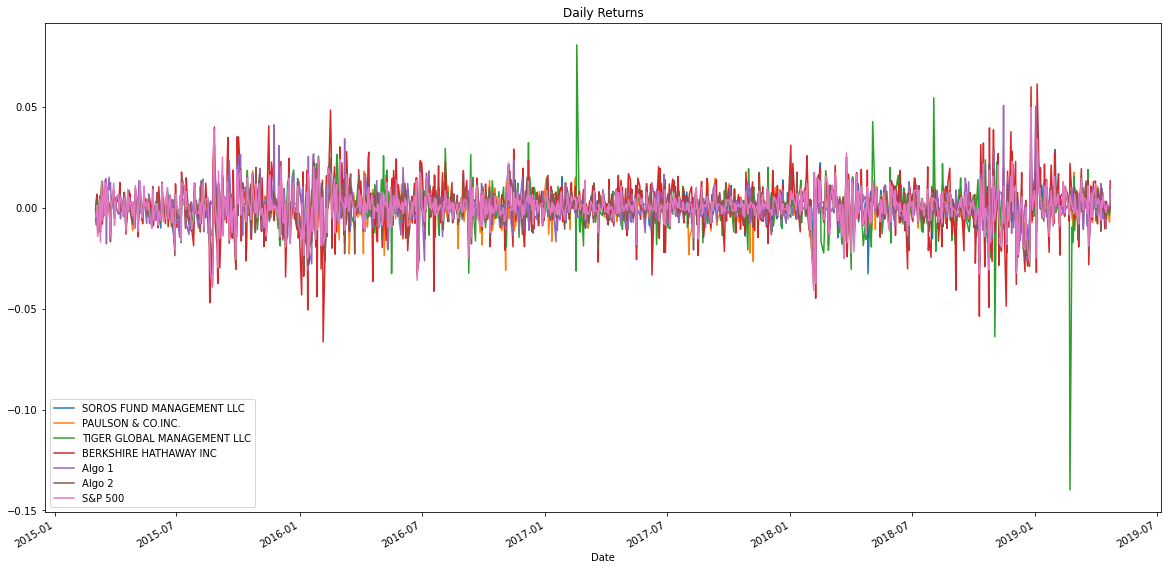

In [17]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20, 10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Combined Returns'}, xlabel='Date'>

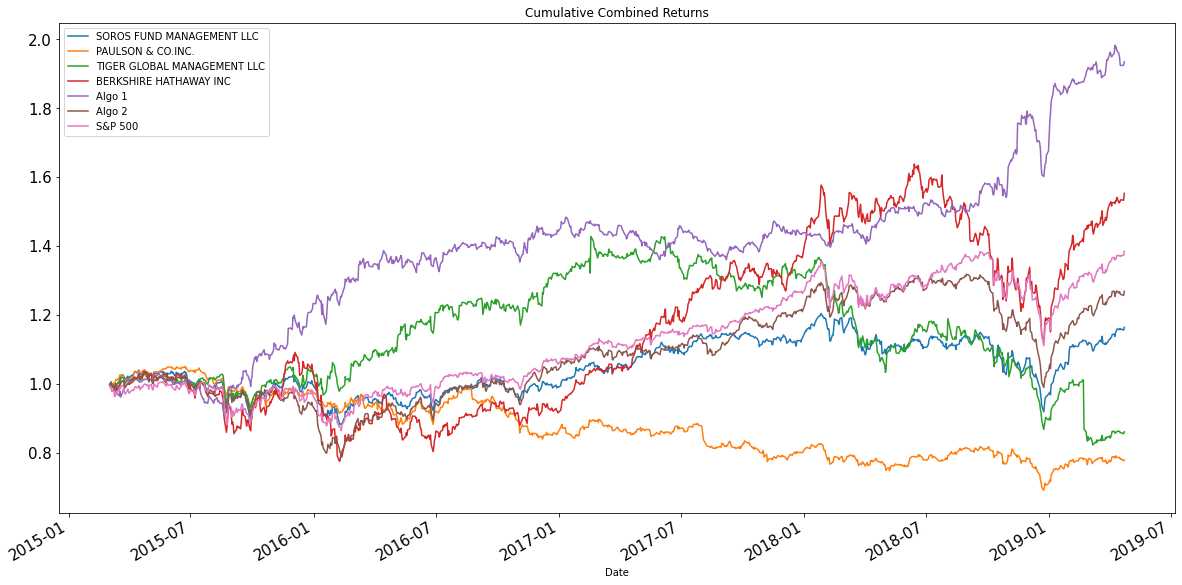

In [18]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Combined Returns", fontsize=15)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

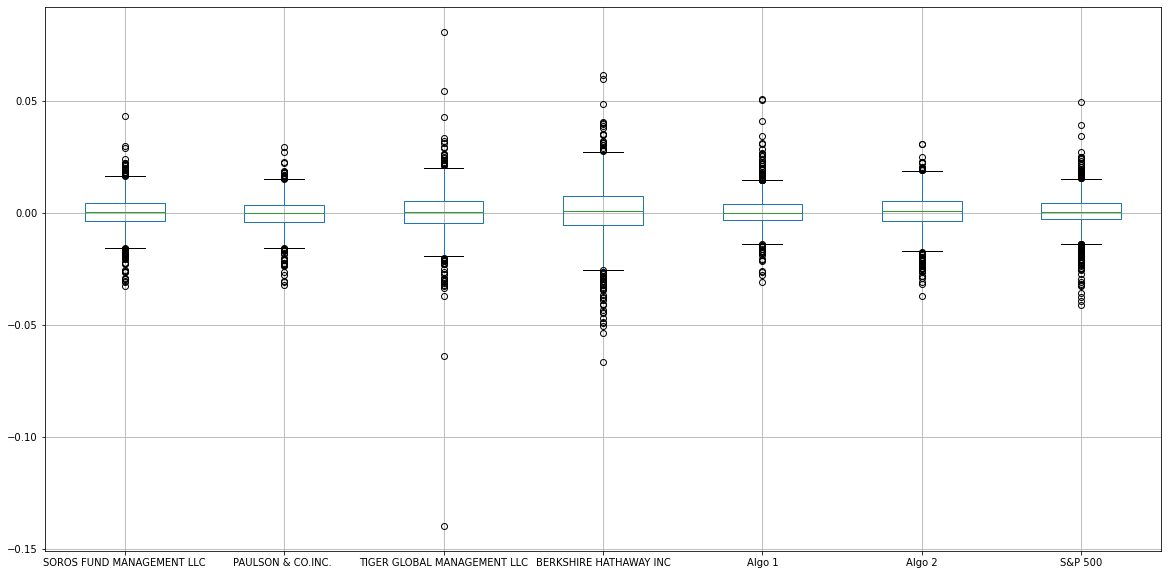

In [19]:
combined_box = combined_df.boxplot(figsize=(20,10))

### Create a box plot for each portfolio


In [20]:
# Box plot to visually show risk


### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std()
combined_df_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_history_df1_std = sp500_history_df1.std()

# Determine which portfolios are riskier than the S&P 500
combined_df_std.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
combined_df_std_ann = combined_df_std * np.sqrt(252) 
combined_df_std_ann


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling STD'}, xlabel='Date'>

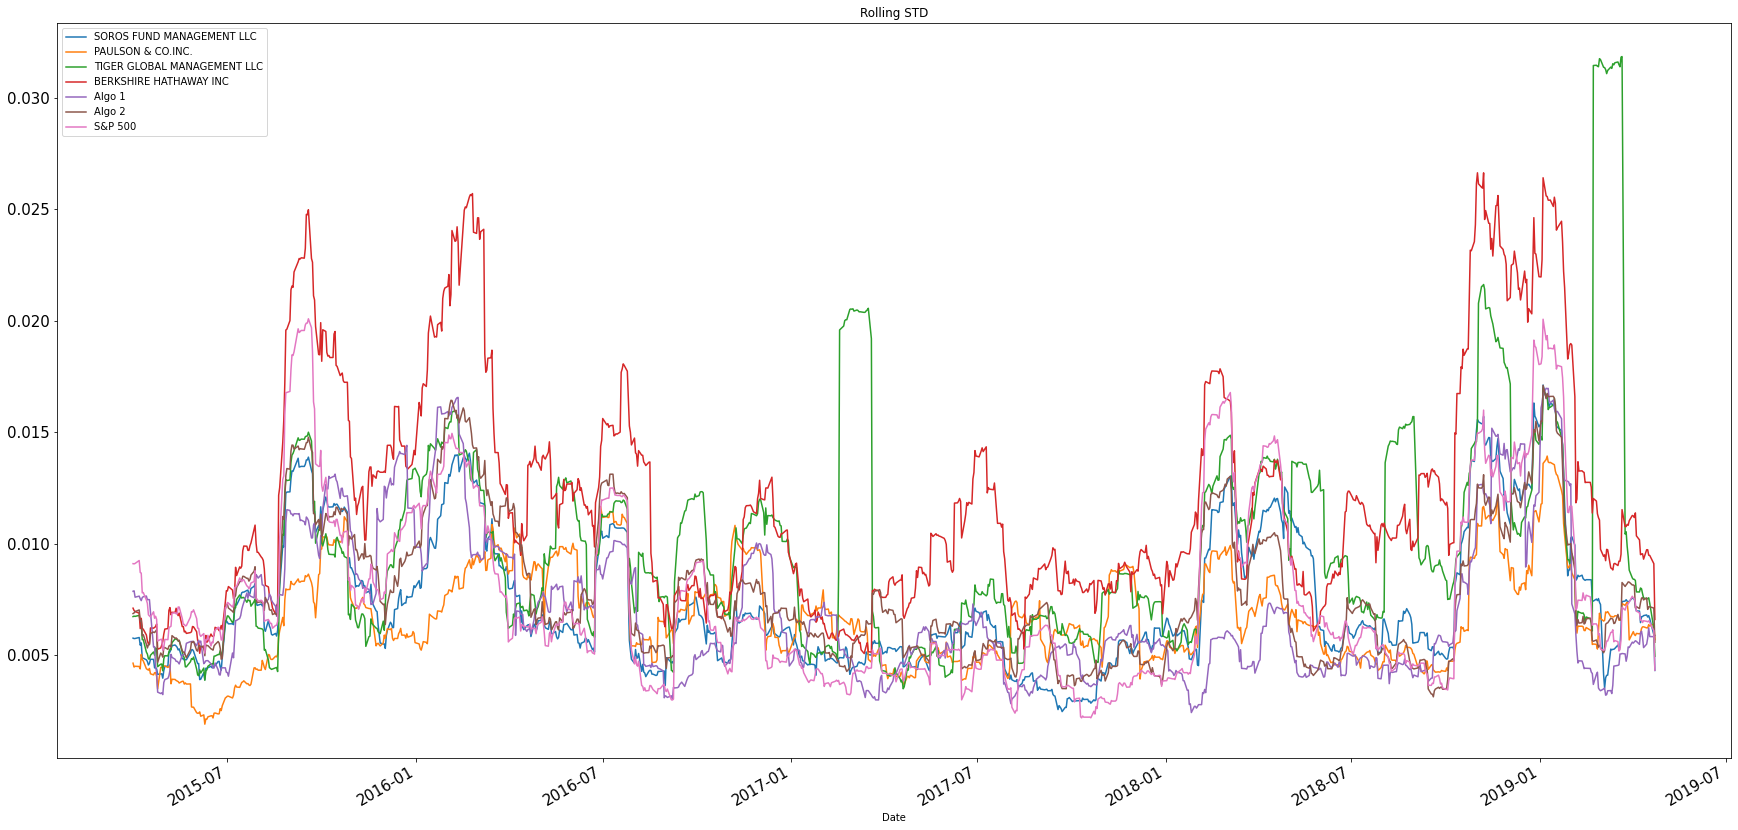

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df_std_roll =combined_df.rolling(21).std()
combined_df_std_roll

# Plot the rolling standard deviation
combined_df_std_roll.plot(figsize=(30,15), title="Rolling STD", fontsize=15)


### Calculate and plot the correlation

In [25]:
# Calculate the correlation
corrMatrix = combined_df.corr()

# Display de correlation matrix
corrMatrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

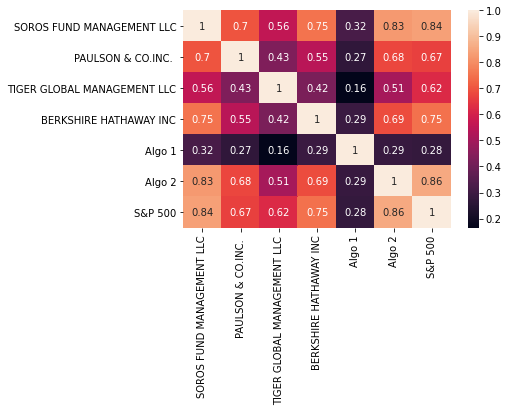

In [26]:
sn.heatmap(corrMatrix, annot = True)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [27]:
# Calculate covariance of a single portfolio
covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P 500'])
covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000001
2019-04-17    0.000003
2019-04-18    0.000003
2019-04-22    0.000003
2019-04-23    0.000003
Length: 1043, dtype: float64

In [28]:
# Calculate variance of S&P 500
variance = combined_df['S&P 500'].rolling(window=60).var()

<AxesSubplot:title={'center':'algo 1 beta'}, xlabel='Date'>

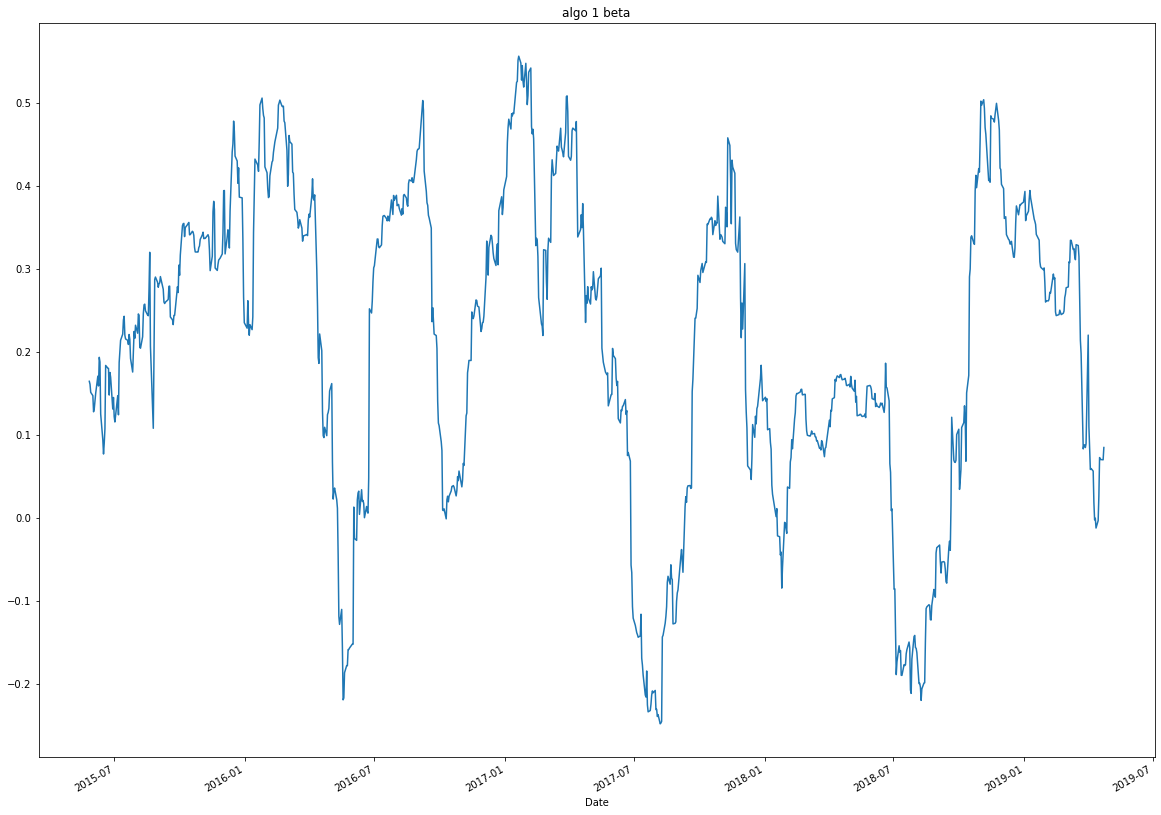

In [29]:
# Computing beta
beta = covariance / variance
beta

# Plot beta trend
beta.plot(figsize = (20, 15), title = "algo 1 beta")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Combined EWM'}, xlabel='Date'>

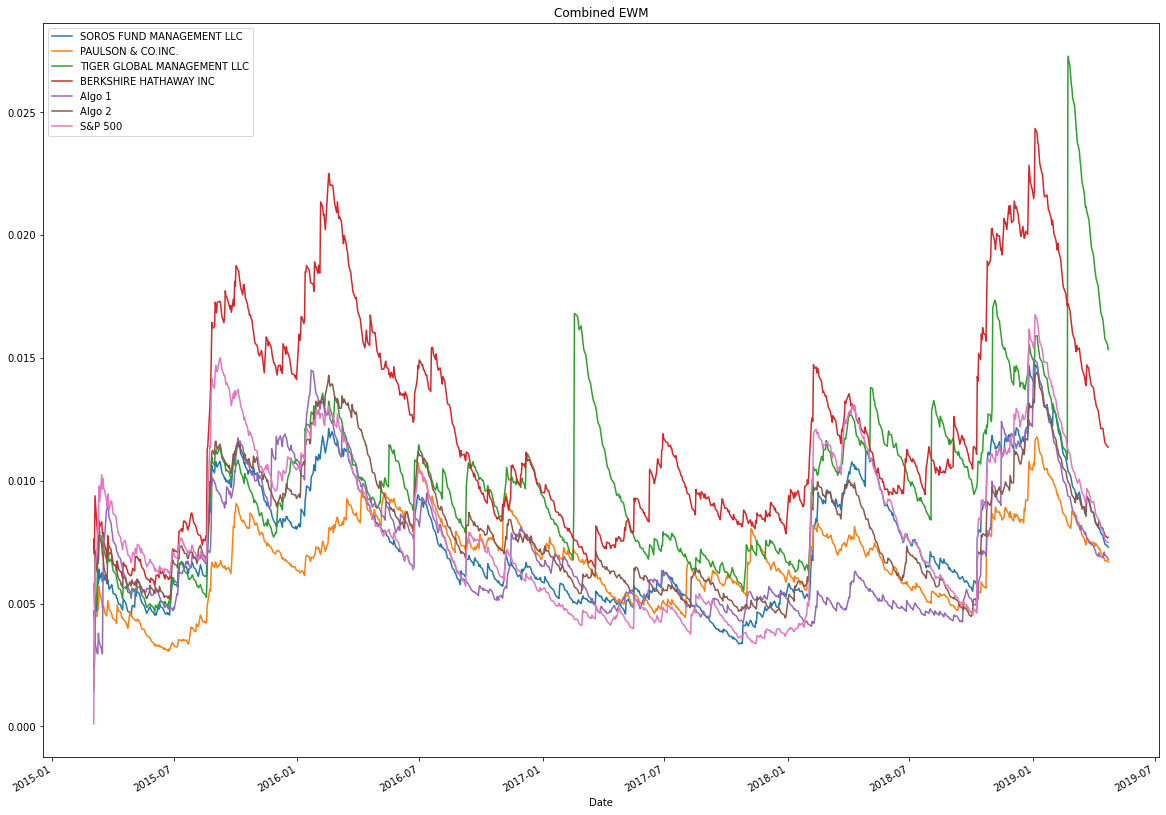

In [30]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize = (20,15), title="Combined EWM")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratio = np.sqrt(252) * (combined_df.mean() / combined_df.std())
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:>

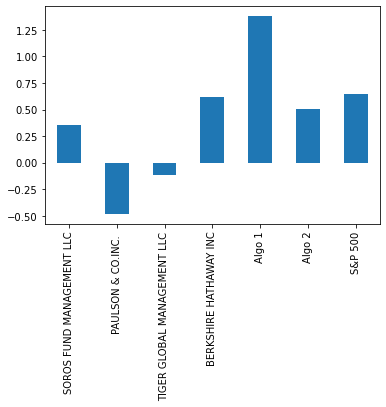

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 does

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [33]:
# Reading data from 1st stock
goog_returns = Path("Resources/goog_historical.csv")
goog_returns_df = pd.read_csv(goog_returns, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_returns_df.sort_index(inplace=True)
goog_returns_df.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [34]:
# Reading data from 2nd stock
aapl_returns = Path("Resources/aapl_historical.csv")
aapl_returns_df = pd.read_csv(aapl_returns, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_returns_df.sort_index(inplace=True)

aapl_returns_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [35]:
# Reading data from 3rd stock
cost_returns = Path("Resources/cost_historical.csv")
cost_returns_df = pd.read_csv(cost_returns, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_returns_df.sort_index(inplace=True)

cost_returns_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [36]:
# Combine all stocks in a single DataFrame
combined_new_df = pd.concat([cost_returns_df, aapl_returns_df, goog_returns_df], axis="rows", join="inner")
combined_new_df


,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [37]:
# Reset Date index
combined_new_df = combined_new_df.reset_index()
combined_new_df.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,COST,195.76
1,2018-05-14,COST,195.88
2,2018-05-15,COST,195.48
3,2018-05-16,COST,198.71
4,2018-05-17,COST,199.60


In [38]:
# Reorganize portfolio data by having a column per symbol; 
portfolio_df = combined_new_df.pivot(index='Trade DATE', columns='Symbol', values='NOCP')
portfolio_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [39]:
# Calculate daily returns
portfolio_pct_change = portfolio_df.pct_change()

# Drop NAs
portfolio_pct_change.dropna(inplace=True)

# Display sample data
portfolio_pct_change.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

"""aapl_weight = 0.3
goog_weight = 0.3
cost_weight = 0.3
"""
portfolio_returns = portfolio_pct_change.dot(weights)
#portfolio_returns = weights * portfolio_pct_change["AAPL"] + goog_weight * portfolio_pct_change["GOOG"] + cost_weight * portfolio_pct_change["COST"]
portfolio_returns.tail()

# Calculate portfolio return


# Display sample data


Trade DATE
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame

combined_df['column'] = portfolio_returns
combined_df.tail()

#portfolio_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,column
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [50]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`
combined_df_ann_std = combined_df.std() * np.sqrt(252)
combined_df_ann_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
column                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

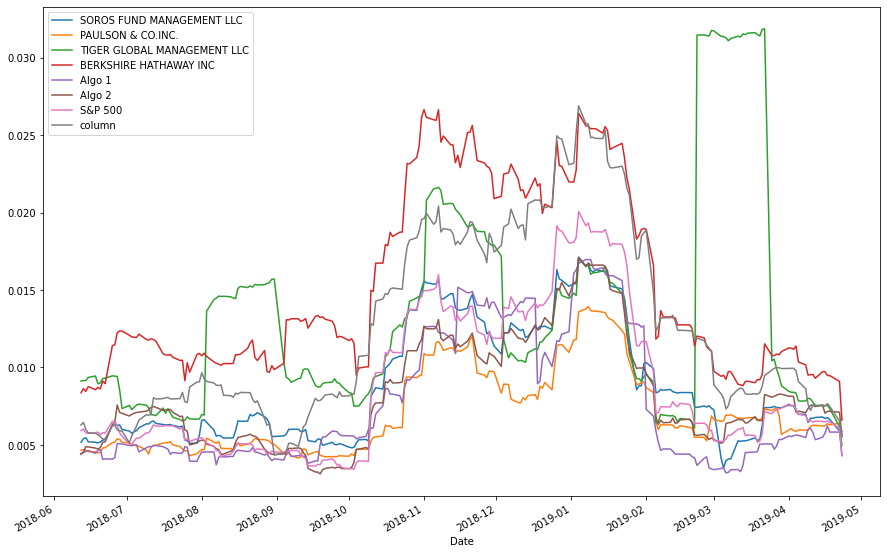

In [53]:
# Calculate rolling standard deviation
rolling_21_std = combined_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_21_std.plot(figsize = (15,10))

### Calculate and plot the correlation

In [58]:
# Calculate and plot the correlation
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,column
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
column,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


<AxesSubplot:>

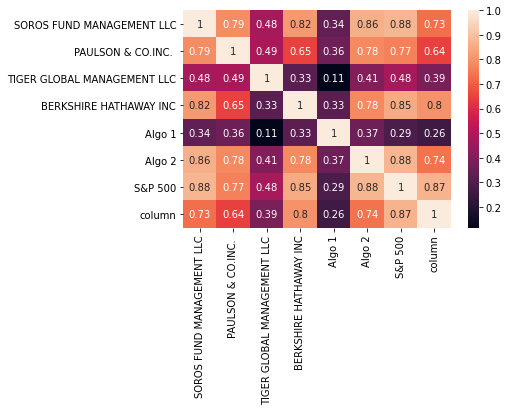

In [59]:
sn.heatmap(correlation, annot = True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

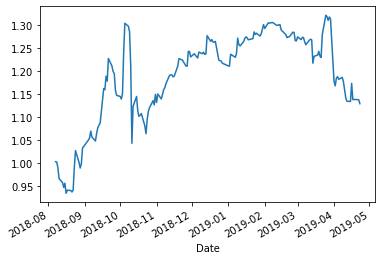

In [60]:
# Calculate and plot Beta
covariance = combined_df['column'].rolling(window=60).cov(combined_df['S&P 500'])
variance = combined_df['S&P 500'].rolling(window=60).var()
beta = covariance / variance
beta.plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [61]:
# Calculate Annualzied Sharpe Ratios: ratio of return to risk 
#mean/std

annual_mean = combined_df.mean() * 252 
annual_std = combined_df.std() * np.sqrt(252)

sharpe_ratios = annual_mean / annual_std

sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
column                         0.933123
dtype: float64

<AxesSubplot:>

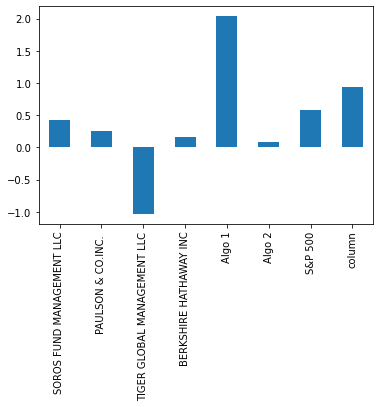

In [62]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
Algo did the best. Custom outperformed S&P 500 

In [49]:
"""

Resources used: 
https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python/46430853     
https://datatofish.com/correlation-matrix-pandas/
"""

'\n\nResources used: \nhttps://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python/46430853     \nhttps://datatofish.com/correlation-matrix-pandas/\n'